# Evaluation Metrics

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms.

## Types of Evaluation Metrics

1. Regression Metrics
2. Classification Metrics

![fvdf](https://cdn-images-1.medium.com/max/800/1*1WPbfzztdv50V22TpA6njw.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day49-regression-metrics/placement.csv'
df = pd.read_csv(link)

df.sample(5)

,cgpa,package
66,5.11,1.63
131,6.37,2.01
95,6.63,2.79
5,7.89,2.99
123,5.10,2.30


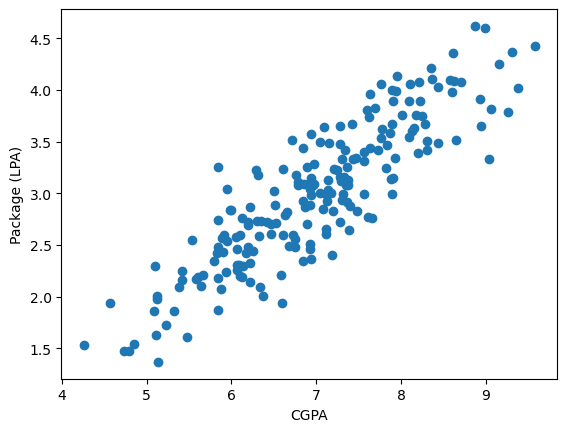

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)');

In [4]:
X = df.iloc[:,:1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2002)

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

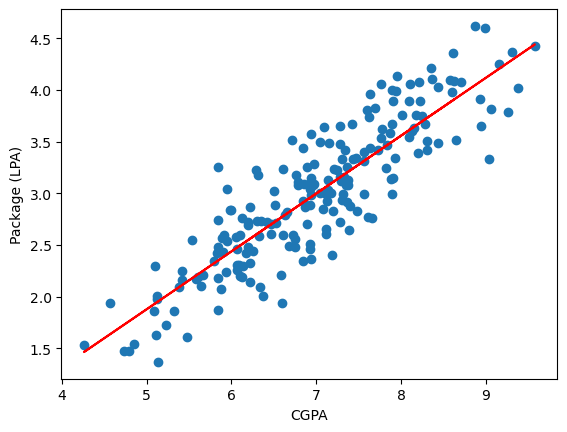

In [8]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),c='r')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)');

# Regression Metrics

Metrics for regression involve calculating an error score to summarize the predictive skill of a model. The difference between the actual output value and model evaluated output value is a method by which we evaluate the models performance. 

[Regression Metrics | CampusX](https://youtu.be/Ti7c-Hz7GSM?si=emuOB69lhjTljABv)

## Types of Regression Metrics

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R2 Score
5. Adjusted R2 Score

## Mean Absolute Error (MAE)

$$\text{Mean Absolute Error } = \frac{1}{n} \sum_{i=1}^n |\hat{y_i}-y_i|$$

|Advantages|Disadvantages|
|--|--|
|Same Unit|Not Differentiable at 0|
|Robust to outliers||

In [9]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [10]:
print('MAE', mean_absolute_error(y_test, lr.predict(X_test)))

MAE 0.30725516750025844


## Mean Squared Error (MSE)

$$\text{Mean Squared Error } = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2$$

|Advantages|Disadvantages|
|--|--|
|Differentiable at all points|Units aren't same|
||Not robust to outliers|

In [11]:
print('MSE', mean_squared_error(y_test, lr.predict(X_test)))

MSE 0.1416133933252028


## Root Mean Squared Error (RMSE)

$$\text{Root Mean Squared Error } = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2}$$

|Advantages|Disadvantages|
|--|--|
|Differentiable at all points|Not much robust to outliers|
|Units are same||

In [12]:
print('MSE', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

MSE 0.37631555020381874


## R2 Score

R-squared (R2) is a statistical measure that represents the goodness of fit of a regression model. It explains to what extent the variance of one variable explains the variance of the second variable

$$\text{R2 Score } = 1 - \frac{SS_R}{SS_M} = 1 - \frac{\sum_{i=1}^n (\hat{y_i}-y_i)^2}{\sum_{i=1}^n (\bar{y_i}-y_i)^2}$$ 

The value of R-square lies between 0 to 1.  
- We get R-square equals 1 when the model perfectly fits the data and there is no difference between the predicted value and actual value. 
- However, we get R-square equals 0 when the model does not predict any variability in the model and it does not learn any relationship between the dependent and independent variables.

[R-squared, Clearly Explained!!!](https://youtu.be/bMccdk8EdGo?si=7HUxBoR4EfaVPl1e)

In [13]:
print('R2 Score', r2_score(y_test, lr.predict(X_test)))

R2 Score 0.7159906096963131


## Adjusted R2 Score

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 
- The adjusted R-squared increases when the new term improves the model more than would be expected by chance. 
- It decreases when a predictor improves the model by less than expected.

Calculated when multiple linear regression is used.

$$\text{Adjusted R2 Score } = 1 - \frac{(1-\text{R2}) (n-1)}{(n-1-k)}$$

$\text{Where,}$  
$\text{n} \rightarrow \text{No. of rows}$  
$\text{k} \rightarrow \text{No. of independent columns}$

In [14]:
print('Adjusted R2 Score', 1 - (1-r2_score(y_test, lr.predict(X_test)))*(60-1)/(60-1-1))

Adjusted R2 Score 0.7110938960703874


**Adding A Random Feature**

In [15]:
n_df = df.copy()
n_df['rand_feat'] = np.random.random(200)

n_df = n_df[['cgpa','rand_feat','package']]
n_df.sample(5)

,cgpa,rand_feat,package
103,7.05,0.913143,3.00
183,7.28,0.945540,2.72
18,6.94,0.050867,2.98
21,6.85,0.076452,2.93
157,6.47,0.578229,2.70


In [16]:
X = n_df.iloc[:,:2]
y = n_df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2002)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

In [21]:
r2 = r2_score(y_test,y_pred)
print(f'R2 Score {r2}')

R2 Score 0.7211511756541329


In [22]:
adj_r2 = 1 - (1-r2)*(60-1)/(60-1-1)
print(f'Adjusted R2 Score {adj_r2}')

Adjusted R2 Score 0.7163434373033422


**Adding A Non-Random Feature**

In [23]:
n_df = df.copy()
n_df['iq'] = n_df['package'] + (np.random.randint(-12,12,200)/10)

n_df = n_df[['cgpa','iq','package']]
n_df.sample(5)

,cgpa,iq,package
160,7.13,3.73,2.93
62,6.34,1.99,2.09
94,5.83,2.52,2.42
112,8.58,3.10,4.10
1,5.12,2.78,1.98


In [24]:
X = n_df.iloc[:,:2]
y = n_df.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2002)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
r2 = r2_score(y_test,y_pred)
print(f'R2 Score {r2}')

R2 Score 0.7648639515024904


In [30]:
adj_r2 = 1 - (1-r2)*(60-1)/(60-1-1)
print(f'Adjusted R2 Score {adj_r2}')

Adjusted R2 Score 0.7608098817008092


||With  1 Valuable Column|With 1 Random Column and 1 Valuable Column|With 2 Valuable Column|
|--|--|--|--|
|R2 Score|0.7159|0.7067|0.7977|
|Adjusted R2 Score|0.7110|0.7017|0.7942|